In [23]:
import pandas as pd                                    # Working with tables
import numpy as np


from tiingo import TiingoClient                       # Stock prices.
import quandl                                         # Economic data, futures prices, ...

# API keys:
tiingo = TiingoClient({'api_key':'349dd4117e5d1ed71a22f0207a8e439cf3f7b06b'})
quandl.ApiConfig.api_key = '_ci7hzC_sPkspKWz2yzt'                      # Replace the XXXX with your API key (must be inside the ' ').

import matplotlib.pyplot as plt                        # Basic plot library.
plt.style.use('ggplot')                                # Make plots look nice.
%matplotlib inline

In [22]:
import sharpe_ratio_finder as srf

In [27]:
import importlib
importlib.reload(srf)

NameError: name 'sharpe_ratio_finder' is not defined

In [24]:
start_date   = '3-23-2020'
end_date     = '3-23-2022'
base_tickers = ['ASX','AGG']
base_weights = [.99,.01]
var_ticker   = ['btcusd']
trading_days = 252

# Here is the model

In [25]:
tickers = ['ASX','AGG','btcusd']

Basic Stock Stats functions
```
r             = srf.returns(tickers,start_date,end_date)
risk_premiums = srf.rp(tickers,start_date,end_date)
volatility    = srf.vol(tickers,start_date,end_date)
covariance    = srf.cov(tickers,start_date,end_date)
correlation   = srf.corr(tickers,start_date,end_date)
```
Return the statistic the function is named for. 


In [26]:
r             = srf.returns(tickers,start_date,end_date,trading_days)
risk_premiums = srf.rp(tickers,start_date,end_date,trading_days)
volatility    = srf.vol(tickers,start_date,end_date,trading_days)
covariance    = srf.cov(tickers,start_date,end_date,trading_days)
correlation   = srf.corr(tickers,start_date,end_date,trading_days)

TypeError: returns() takes 3 positional arguments but 4 were given

In [9]:
xmax = 1
ymin = -.2
ymax = 2

Mean Vol Plot Function:
``` 
mean_vol_plot(tickers,risk_premiums,vol,xmax,ymin,ymax):
```
Returns a mean-volatility plot

<AxesSubplot:xlabel='Volatility', ylabel='Risk_premium'>

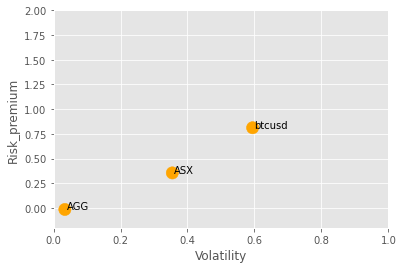

In [10]:
srf.mean_vol_plot(tickers,risk_premiums,volatility,xmax,ymin,ymax)

Efficient Frontier Function
```
efficient_frontier(tickers,risk_premiums,vol,cov,xmax,ymin,ymax)
```
Simulates 1000 random portfolios and graphs all of them on a mean-volatility plot. 
Returns the graph. 

<AxesSubplot:xlabel='Volatility', ylabel='Risk_premium'>

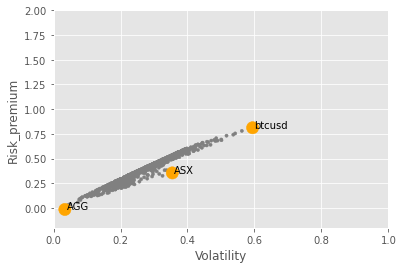

In [11]:
srf.efficient_frontier(tickers,risk_premiums,volatility,covariance,xmax,ymin,ymax)

Max Sharpe Weight Function
```
max_sharpe_weights(tickers,risk_premiums,vol,cov)
```
Does the same simulation as the efficient frontier function, but puts the results in a DataFrame instead of a graph. The function then locates the maximum sharpe ratio, finds the corresponding weights, and puts those weights in a dataframe.
Returns the dataframe.

In [12]:
max_sharpe_weights = srf.max_sharpe_weights(tickers,risk_premiums,volatility,covariance)
max_sharpe_weights

,Risk_Premiums,Weights,weighted_ret
ASX,0.355279,0.478758,0.170093
AGG,-0.014476,0.018845,-0.000273
btcusd,0.812330,0.502397,0.408112


Maximum Sharpe Ratio Value Function
```
sharpe_ratio_value(tickers,risk_premiums,vol,cov)
```
Returns the value of the sharpe ratio that corresponds with the above weights. 

Risk Premium Function
```
max_sharpe_risk_premium(tickers,risk_premiums,vol,cov)
```
Returns the risk premium associated with the maximum sharpe ratio.

Volatility function
```
max_sharpe_volatility(tickers,risk_premiums,vol,cov)
```
Returns the volatility associated with the maximum sharpe ratio portfolio.


In [13]:
sharpe_ratio = srf.sharpe_ratio_value(tickers,risk_premiums,volatility,covariance)
sharpe_ratio

1.516745768221157

In [14]:
max_sharpe_risk_premium = srf.max_sharpe_risk_premium(tickers,risk_premiums,volatility,covariance)
max_sharpe_risk_premium

564    0.578162
Name: Risk_premium, dtype: float64

In [15]:
max_sharpe_volatility = srf.max_sharpe_volatility(tickers,risk_premiums,volatility,covariance)
max_sharpe_volatility

820    0.382204
Name: Volatility, dtype: float64

Variable Weights Function
```
var_weight_plot(base_tickers,var_ticker,base_weights,start_date,end_date,n)
```
Varies the weight of the variable security (in this case some kind of crypto) from 1/n to n/n and graphs the changes in Sharpe Ratio, Risk Premium, and Volatility. 
Important notes - 
    - There can be as many tickers in the base portfolio as you want, but there can only be one variable ticker
    - You must put in the weights of the base portfolio as an argument to the function
    
This function returns the graph as well as the dataframe containing the simulation's results.
  

In [16]:

n = 100

(    var_weight  Risk_Premium  Volatility  Sharpe_Ratio
 0         0.00      0.445453    0.411373      1.082845
 1         0.01      0.451262    0.409271      1.102599
 2         0.02      0.457070    0.407265      1.122293
 3         0.03      0.462879    0.405356      1.141908
 4         0.04      0.468687    0.403545      1.161424
 ..         ...           ...         ...           ...
 95        0.95      0.997261    0.627367      1.589599
 96        0.96      1.003070    0.632554      1.585746
 97        0.97      1.008878    0.637767      1.581891
 98        0.98      1.014687    0.643006      1.578037
 99        0.99      1.020495    0.648269      1.574185
 
 [100 rows x 4 columns],
 <AxesSubplot:>)

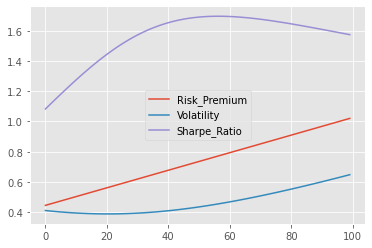

In [17]:
srf.var_weight_plot(base_tickers,var_ticker,base_weights,start_date,end_date,n)